In this tutorial, we would like to demonstrate how to plot non-seismic data like a velocity model. First, import the required modules:

In [1]:
import numpy as np

import sys
sys.path.insert(1, '../')

import seisplot

Now let's load a velocity model previously stored as .npy file on disk:

In [2]:
vmod = np.load("data/vmod.npy")
nt, ns = vmod["data"].shape
dz = vmod["d1"][0]
dx = vmod["d2"][0]
print("nt=%d, ns=%d, dx=%f, dz=%f" % (nt, ns, dx, dz))

nt=380, ns=150, dx=20.000000, dz=20.000000


The variable `vmod` is a Numpy structured array including trace headers. The actual velocity data is `vmod["data"]`. As the file was originally a velocity model in SU format, the trace headers contain the variables `d1` and `d2`, specifying the vertical and horizontal sampling interval, respectively. We extract those parameters from the first trace. We should have 380 traces, each trace with 150 samples. The spacing is 20 meters in both directions, x and z. The first sample in z-direction in this model is located at -500 meters, i.e., 500 meters above sea level.

Let's start with something basic and see how it looks like:

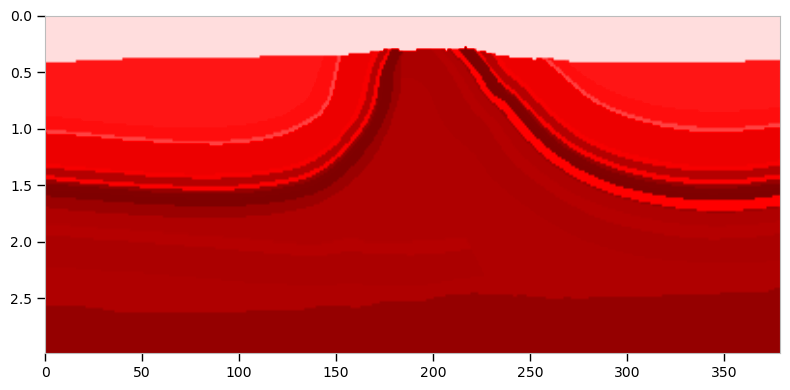

In [3]:
fig, ax = seisplot.plot(vmod, width=8, height=4)

Okay, we can see some shades (the model actually contains a salt structure) but the colors are all biased. The reason is that seisplot by default expects "seismic" data with positive and negative amplitudes. However, a velocity model only has positive values, i.e., we need to adjust the clip values. Let's create a horizontal and vertical axis, and then plot the model with a modified clip. We should also adjust the default color bar which is called "seismic" - it's based on blue-white-red. Having color "white" in the center of the value range is non-ideal for velocity data. So let's use colormap "jet".

We can also take out some values from the matrix to be displayed, namely the air layer. Matplotlib will ignore values set to Not-a-Number. So let's set all velocity values smaller than 1000 m/s to NaN.

vmin=1900.0, vmax=5068.5


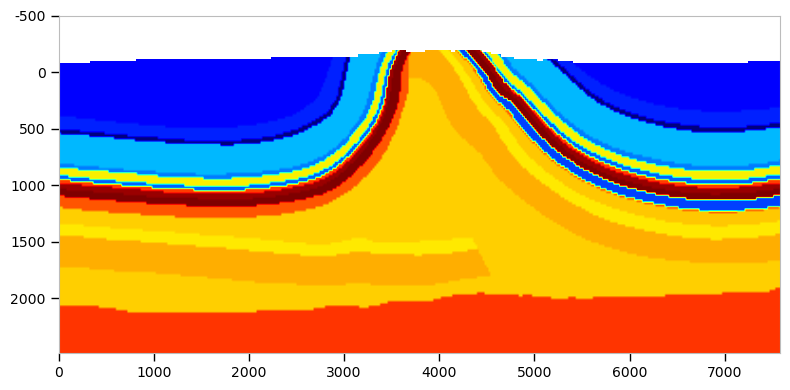

In [4]:
haxis = np.arange(0, (nt-1)*dx+dx/2, dx)
zstart = -500
vaxis = np.arange(zstart, zstart+(ns-1)*dz+dz/2, dz)

velo = vmod["data"]
velo[velo < 1000] = np.nan

vmin = np.nanmin(velo)
vmax = np.nanmax(velo)

print("vmin=%.1f, vmax=%.1f" % (vmin, vmax))

fig, ax = seisplot.plot(velo, width=8, height=4, vaxis=vaxis, haxis=haxis, lowclip=vmin, highclip=vmax, colormap="jet")

Okay, that's already a reasonable display of the velocity model. However, we are missing some labels and a colorbar. Let's add those and give the final drawing a little polish:

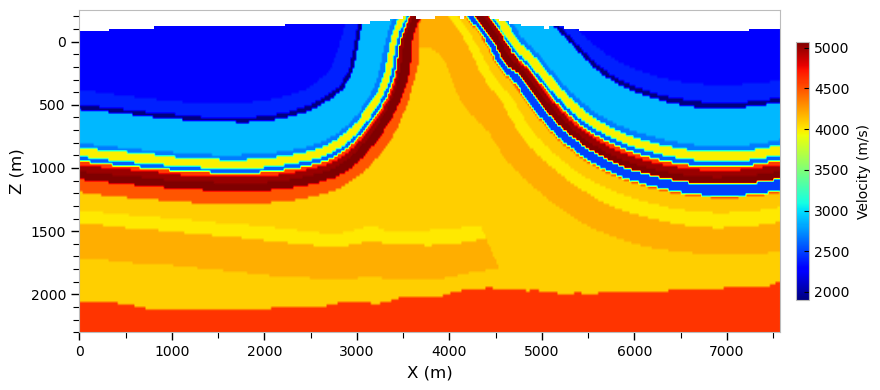

In [5]:
fig, ax = seisplot.plot(velo, width=9, height=4, vaxis=vaxis, haxis=haxis, lowclip=vmin, highclip=vmax, 
                        colormap="jet", colorbar=True, colorbarlabel="Velocity (m/s)", 
                        colorbarshrink=0.8, colorbarlabelpad=5, vlabel="Z (m)", hlabel="X (m)",
                        vminorticks=100, hminorticks=500, vaxisbeg=-250, vaxisend=2300)

And that's it! If you preferred a smaller number of velocity ticks for the colorbar, this can be achieved using the `colorbarbins` option. Let's also add a grid:

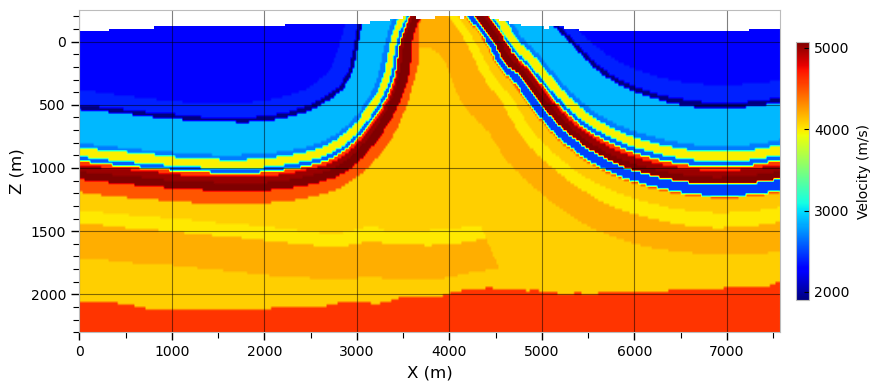

In [6]:
fig, ax = seisplot.plot(velo, width=9, height=4, vaxis=vaxis, haxis=haxis, lowclip=vmin, highclip=vmax, 
                        colormap="jet", colorbar=True, colorbarlabel="Velocity (m/s)", 
                        colorbarshrink=0.8, colorbarlabelpad=5, vlabel="Z (m)", hlabel="X (m)",
                        vminorticks=100, hminorticks=500, vaxisbeg=-250, vaxisend=2300,
                        colorbarbins=4, vgrid="major", hgrid="major")